In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [2]:
housing_df=pd.read_csv('housing.csv')

In [3]:
housing_df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
housing_df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


##Plotting the graphs for MEDV vs all three features to see varaition of medv with each feature

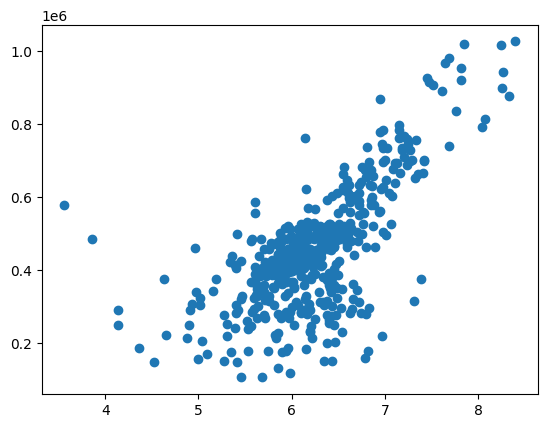

In [22]:
plt.plot(housing_df['RM'],housing_df['MEDV'],'o');

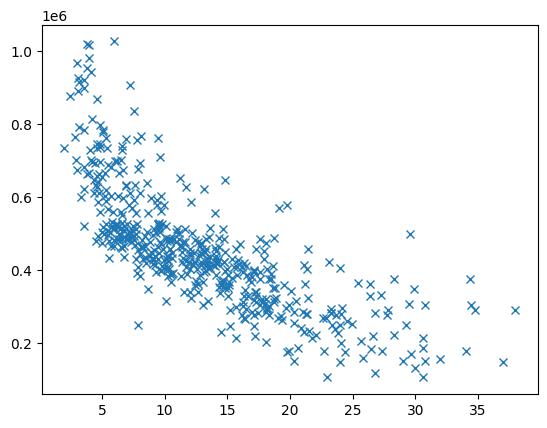

In [23]:
plt.plot(housing_df['LSTAT'],housing_df['MEDV'],'x');

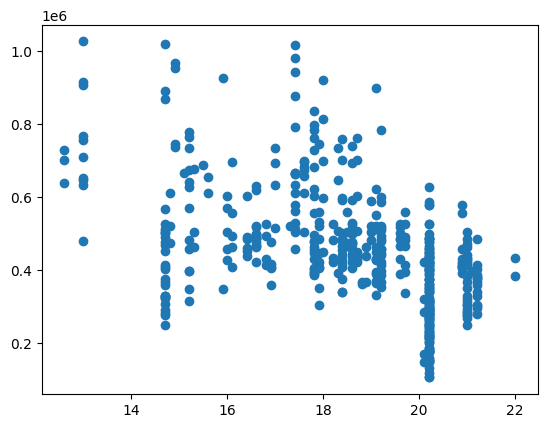

In [25]:
plt.plot(housing_df['PTRATIO'],housing_df['MEDV'],'o');

##Normalizing the data

In [36]:
scaler = StandardScaler()
housing=scaler.fit_transform(np.array(housing_df))

In [37]:
housing

array([[ 0.52055395, -1.1250769 , -1.5250831 ,  0.30064004],
       [ 0.28104837, -0.53706982, -0.33974768, -0.00449803],
       [ 1.46924486, -1.25935736, -0.33974768,  1.66104726],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167,  0.28792595],
       [ 0.86114953, -0.91305511,  1.17748167,  0.04635831],
       [-0.32704695, -0.71516812,  1.17748167, -1.23776439]])

In [48]:
X=housing[:,:3]
Y=housing[:,-1].reshape(-1,1)

In [96]:
print(X.shape)
print(Y.shape)

(489, 3)
(489, 1)


##Splitting the data into training and test data (not using vaidation set as lenght of data is small)

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

##Fitting a simple Linear Regression model on RM feature and calculating the Mean Squared Error(MSE)

In [68]:
rm_model=LinearRegression().fit(X_train[:,0].reshape(-1,1),Y_train)

In [77]:
y_predicted=rm_model.predict(X_test[:,0].reshape(-1,1))
rm_mse=mean_squared_error(Y_test,y_predicted)

In [78]:
rm_mse

0.3728441786568415

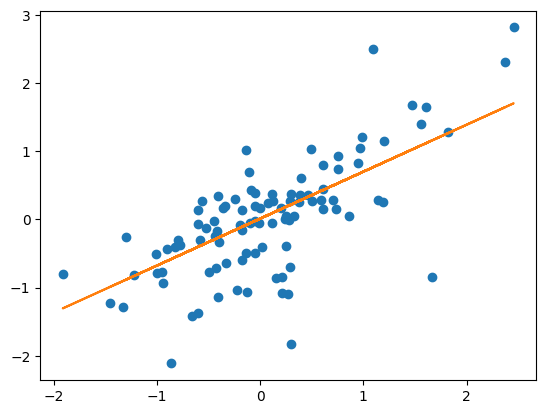

In [76]:
plt.plot(X_test[:,0].reshape(-1,1),Y_test,'o',
         X_test[:,0].reshape(-1,1),y_predicted,'-');

##Fitting a simple Linear Regression model on LSTAT feature and calculating the Mean Squared Error(MSE)

In [80]:
lstat_model=LinearRegression().fit(X_train[:,1].reshape(-1,1),Y_train)

In [105]:
y_predicted=lstat_model.predict(X_test[:,1].reshape(-1,1))
lstat_mse=mean_squared_error(Y_test,y_predicted)

In [106]:
lstat_mse

0.31001618207326437

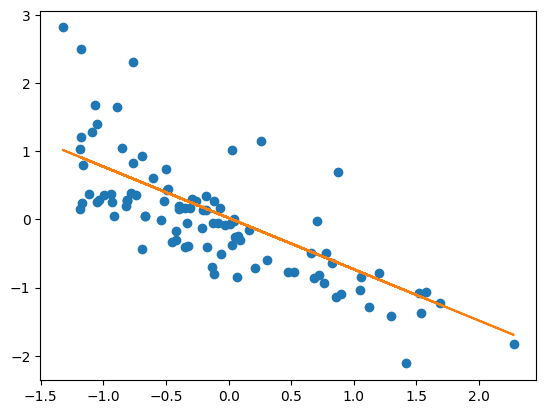

In [107]:
plt.plot(X_test[:,1].reshape(-1,1),Y_test,'o',
         X_test[:,1].reshape(-1,1),y_predicted,'-');

##Fitting a simple Linear Regression model on PTRATIO feature and calculating the Mean Squared Error(MSE)

In [85]:
ptratio_model=LinearRegression().fit(X_train[:,2].reshape(-1,1),Y_train)

In [102]:
y_predicted=ptratio_model.predict(X_test[:,2].reshape(-1,1))
ptratio_mse=mean_squared_error(Y_test,y_predicted)

In [103]:
ptratio_mse

0.6243032265892781

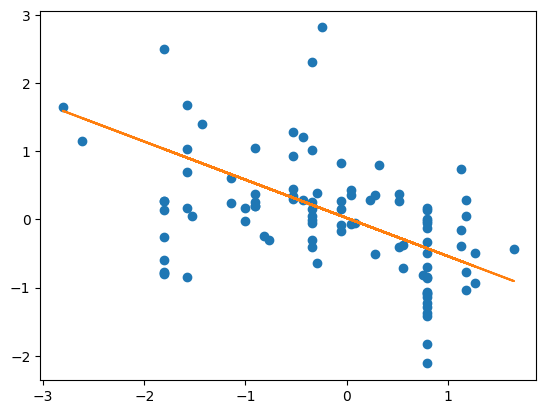

In [104]:
plt.plot(X_test[:,2].reshape(-1,1),Y_test,'o',
         X_test[:,2].reshape(-1,1),y_predicted,'-');

## Fitting a linear regression model on all features together

In [98]:
multiple_model=LinearRegression().fit(X_train,Y_train)

In [100]:
y_predicted=multiple_model.predict(X_test)
multiple_mse=mean_squared_error(Y_test,y_predicted)

In [101]:
multiple_mse

0.20057950163410743

##Using L2 Regularization (Ridge Regression) to see if it can reduce mse on multiple_model
###Cross-validation is used to evaluate models based on different alphas

In [116]:
alpha=[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]

In [145]:
ridge_model=RidgeCV(alpha,store_cv_values=True)
ridge_model.fit(X_train,Y_train)
ridge_model.alpha_ #It gives the best value of alpha

10.0

In [121]:
y_predicted=ridge_model.predict(X_test)
ridge_mse=mean_squared_error(Y_test,y_predicted)

In [122]:
ridge_mse

0.20124691750482337

In [152]:
lasso_model=LassoCV(alphas=alpha,cv=10)
lasso_model.fit(X_train,Y_train)
lasso_model.alpha_ #It gives the best value of alpha

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11670486491925658, tolerance: 0.037486632568759545
  model = cd_fast.enet_coordinate_descent_gram(


0.001

In [153]:
y_predicted=lasso_model.predict(X_test)
lasso_mse=mean_squared_error(Y_test,y_predicted)

In [154]:
lasso_mse

0.20060569061269776

#Conclusion
###The best single feature is LSTAT and the best model(model with least MSE on test data) is multiple model